       skills  technologies  \
1  JavaScript  [JavaScript]   
1        HTML  [JavaScript]   
1         CSS  [JavaScript]   
1    React JS  [JavaScript]   
1  TypeScript  [JavaScript]   

                                            benefits  junior  medior  senior  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  
1  [Cyklisté vítáni, Čas na inovace, Herní zóna, ...       0       0       1  


<AxesSubplot:xlabel='skills'>

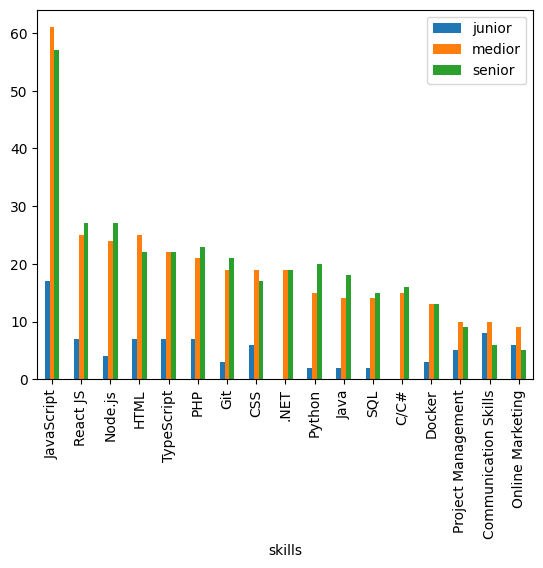

In [1]:
import data_loader
import pandas
import matplotlib.pyplot as plt

suj_data_loader = data_loader.StartUpJobsDataLoader()
skill_column_flat = suj_data_loader.load_skills_data()

skill_column_expanded = skill_column_flat["level"].apply(pandas.Series)
skill_column_flat_merged = skill_column_flat.merge(right=skill_column_expanded, left_index=True, right_index=True)
skill_column_flat_merged = skill_column_flat_merged.drop(columns=["level"])
skill_column_flat_merged = skill_column_flat_merged.dropna()
skill_column_flat_merged = skill_column_flat_merged.explode("skills")
print(skill_column_flat_merged.head())

skill_column_flat_merged_grouped = pandas.DataFrame(skill_column_flat_merged.groupby("skills").sum())
skill_column_flat_merged_grouped["total"] = skill_column_flat_merged_grouped["junior"] + \
                                            skill_column_flat_merged_grouped["medior"] + \
                                            skill_column_flat_merged_grouped["senior"]
skill_column_flat_merged_grouped_top = skill_column_flat_merged_grouped.sort_values(by="total", ascending=False).head(
    17)

skill_column_flat_merged_grouped_top[["junior", "medior", "senior"]].plot(kind="bar")

<AxesSubplot:xlabel='benefits'>

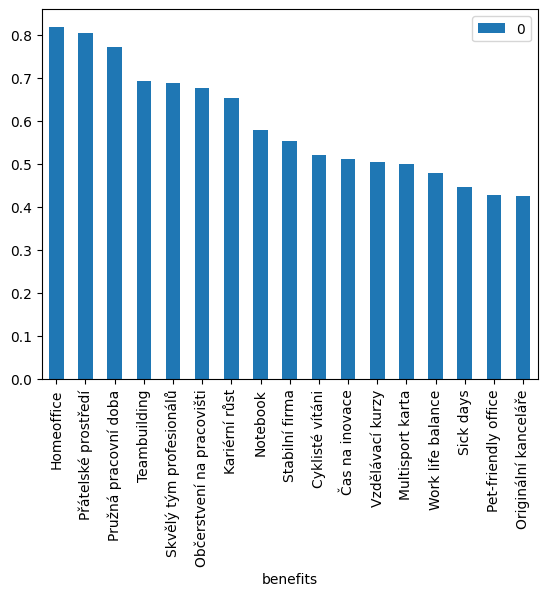

In [15]:
benefits_column = skill_column_flat.explode("benefits")
benefits_column = pandas.DataFrame(benefits_column.groupby("benefits").size())
benefits_column[0] = benefits_column[0] / skill_column_flat.shape[0]
benefits_column = benefits_column.sort_values(by=0, ascending=False).head(17)
benefits_column.plot(kind="bar")